In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/eli/anaconda3/envs/HTFA

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/21/2019 21:58:14 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 21:58:17 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 21:58:21 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 21:58:24 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

In [6]:
dtfa.load_state('data/lepping_2017_k100_n1000_01212019_143020')

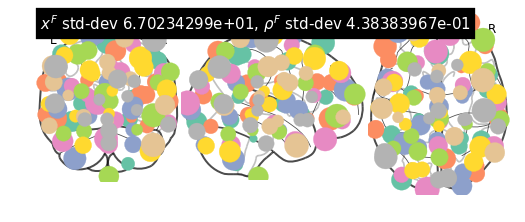

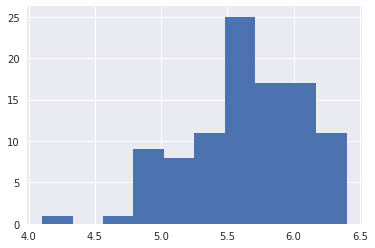

(<nilearn.plotting.displays.OrthoProjector at 0x7f1df2df6ef0>,
 tensor([[ -38.3698,  -96.0467,  -12.4854],
         [  54.2190,   14.3643,   -4.5814],
         [  -0.7409,   39.6358,   13.6138],
         [ -20.2496,  -32.2641,   39.7399],
         [  20.7842,  -54.4591,  -57.0634],
         [  45.6371,  -53.9180,   56.7246],
         [ -24.6376,  -36.5086,  -29.9579],
         [  -0.8042,   36.8536,   70.8906],
         [ -28.3125,   -5.2855,    6.4218],
         [  25.2664,  -52.4432,   13.7274],
         [  22.1141,  -60.3274,  -10.2903],
         [  52.1088,   -0.5552,   51.4935],
         [ -49.1844,  -48.3474,   58.6783],
         [   7.6787,  -73.7943,   61.8306],
         [ -22.3253,   -7.5855,   30.7489],
         [ -55.7424,   44.4633,   -9.1665],
         [  33.9000,   69.4863,   15.2429],
         [  40.0099,  -89.2559,   15.4389],
         [  49.4972,   45.0956,   29.0596],
         [ -65.6132,  -41.8753,   -5.4167],
         [  24.5386,   21.9176,   -8.4676],
         [ -5

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [9]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    elif block.task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif block.task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = block.task.capitalize()
    return task

In [10]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

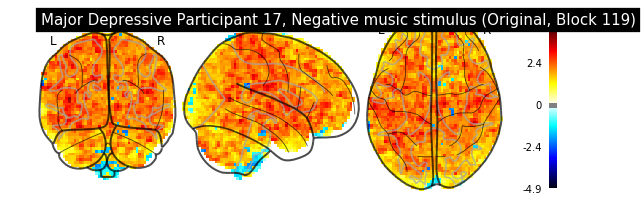

01/21/2019 22:08:54 Reconstruction Error (Frobenius Norm): 7.41637634e+02 out of 9.29792114e+02


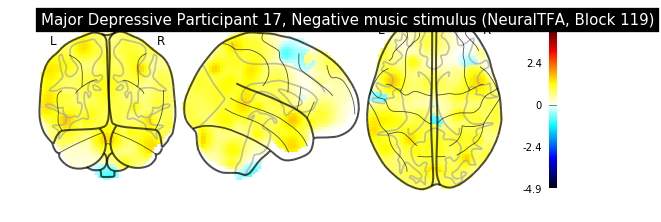

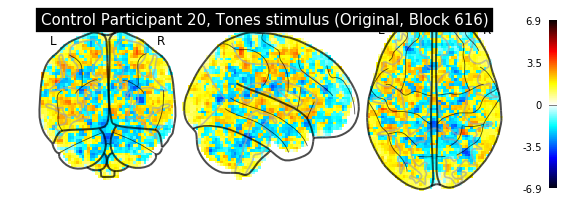

01/21/2019 22:08:59 Reconstruction Error (Frobenius Norm): 8.61553833e+02 out of 8.65296143e+02


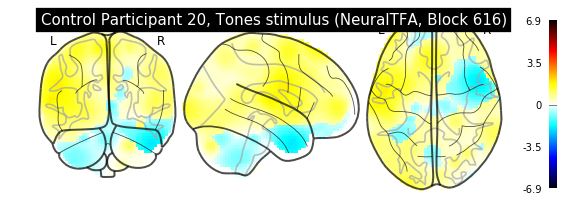

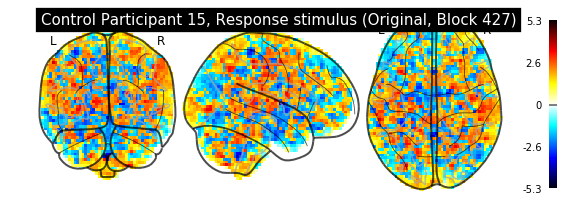

01/21/2019 22:09:02 Reconstruction Error (Frobenius Norm): 3.07550629e+02 out of 2.53298782e+02


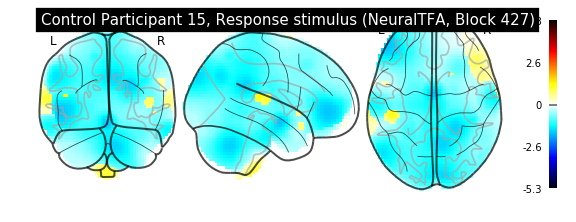

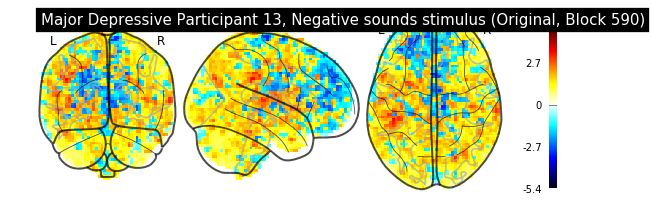

01/21/2019 22:09:06 Reconstruction Error (Frobenius Norm): 6.78486572e+02 out of 6.96712646e+02


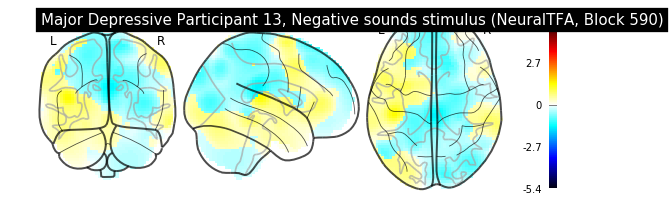

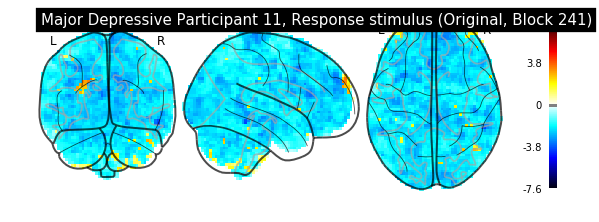

01/21/2019 22:09:10 Reconstruction Error (Frobenius Norm): 2.37598007e+02 out of 3.38348633e+02


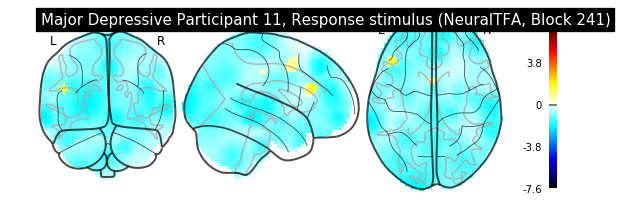

In [11]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


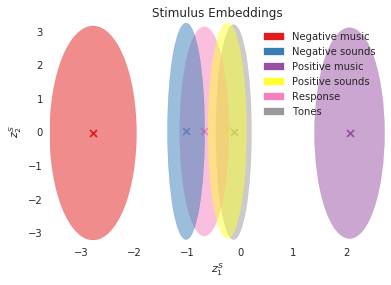

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


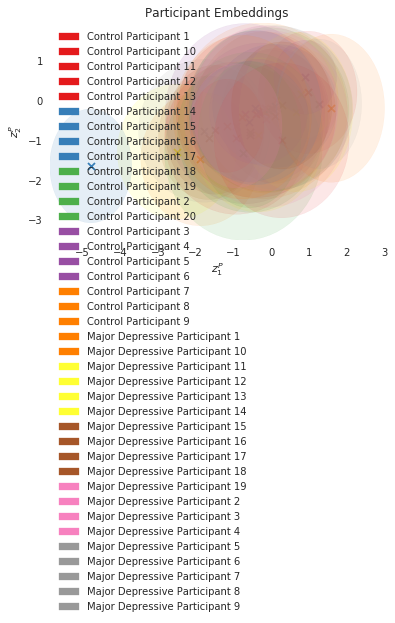

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

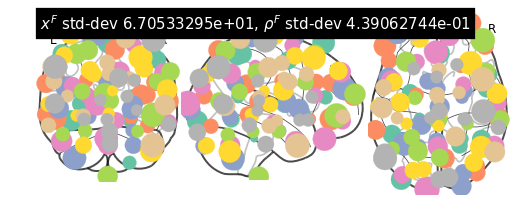

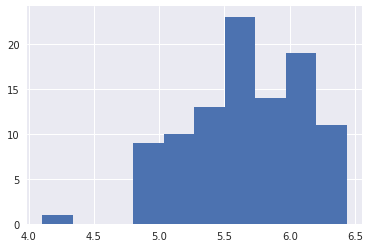

(<nilearn.plotting.displays.OrthoProjector at 0x7f1df0089550>,
 tensor([[ -38.7480,  -95.5294,  -11.5543],
         [  53.3415,   14.8649,   -3.8859],
         [  -0.3472,   39.3416,   13.4995],
         [ -19.5514,  -31.5475,   39.6203],
         [  22.3148,  -54.9209,  -55.9596],
         [  45.6889,  -53.4237,   57.3424],
         [ -25.4959,  -35.7195,  -29.6851],
         [   0.2395,   37.3700,   71.0819],
         [ -29.3778,   -3.9399,    5.9985],
         [  25.1419,  -52.8678,   14.2000],
         [  22.5140,  -59.6798,   -9.6414],
         [  51.1944,    0.1650,   52.4093],
         [ -48.5963,  -47.9562,   59.0967],
         [   6.7968,  -73.3482,   62.9970],
         [ -23.0119,   -6.5500,   31.0663],
         [ -55.9410,   45.0194,   -9.2900],
         [  34.4865,   68.9762,   15.4084],
         [  40.6640,  -88.4442,   15.1952],
         [  49.3046,   44.9562,   28.8259],
         [ -66.0524,  -42.0389,   -5.0466],
         [  23.8233,   22.8562,   -9.4155],
         [ -5

In [14]:
dtfa.visualize_factor_embedding()

In [15]:
dtfa.average_reconstruction_error()

01/21/2019 22:13:21 Average reconstruction error (MSE): 8.65353605e-01
01/21/2019 22:13:21 Average data norm (Euclidean): 9.63051352e-01
01/21/2019 22:13:21 Percent average reconstruction error: 0.344003


(0.8653536045489483, 0.9630513515838449, 0.003440026759145956)

In [16]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


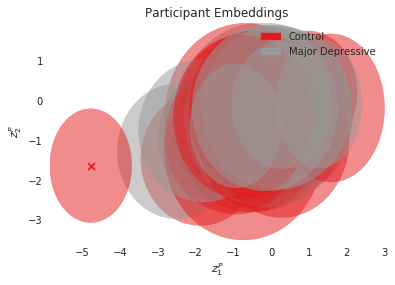

In [17]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)